# Magic Formula

- Baixar dados do Fundamentos por meio de webscraping
- Tratar os dados do Fundamentos
- Salvar a Planilha dos dados do fundamentus em um csv
- Utilizar panilha de dados baixadas do comdinheiro para tirar os dados setorial
- Tratar os dados do Fundamentos
- Juntar os dados do Fundamentos e do Comdinheiro
- Criar um dataframe com os dados necessários
  - TICKER, LIQUIDEZ, EV/EBIT, ROIC, SETOR
- Dados para utilizar na análise
    - Liquidez diária > 500.000,00
    - Criar uma coluna com a sequencia do EV/EBIT do menor>maior
    - Criar uma coluna com a sequencia do ROIC do maior>menor
    - Criar uma coluna com a soma das colunas EV/EBIT + ROIC e ordenar menor>maior
- Salvar o Resultado em uma Planilha de excel (xlsx)

### Carregar as bibliotecas

In [1]:
import requests
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt  # Adicione esta linha
from pandas.plotting import table

### Baixar dados do Fundamentos por meio de webscraping

In [2]:
def fetch_data(url):
    # Define um cabeçalho de agente de usuário para simular um navegador real
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

    # Faz uma solicitação HTTP para a página com os cabeçalhos
    response = requests.get(url, headers=headers)

    # Verifica se a solicitação foi bem-sucedida
    if response.status_code == 200:
        return response.content
    else:
        raise Exception(f'Erro ao acessar a página da web: {response.status_code}')

def parse_html(html_content):
    # Parse da página usando BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Encontra a tabela que você deseja raspar
    table = soup.find('table')
    return table

def main():
    # URL da página da web com a tabela
    url = 'https://www.fundamentus.com.br/resultado.php'

    try:
        # Obtém o conteúdo HTML da página
        html_content = fetch_data(url)

        # Parse do conteúdo HTML
        table = parse_html(html_content)

        # Lê a tabela em um DataFrame Pandas com os parâmetros 'decimal' e 'thousands'
        df = pd.read_html(str(table), decimal=',', thousands='.')[0]  # Transforma a tabela HTML em um DataFrame

        # Salva os dados em uma planilha Excel (.csv)
        df.to_csv('fundamentus_resultado.csv', index=False)  # index=False para não incluir o índice no arquivo

        print('Os dados foram salvos em "stocks_resultado.csv"')
    except Exception as e:
        print(f'Erro: {e}')

if __name__ == '__main__':
    main()


C:\Users\dioni\AppData\Local\Temp\ipykernel_35316\2304581344.py:36: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table), decimal=',', thousands='.')[0]  # Transforma a tabela HTML em um DataFrame


Os dados foram salvos em "stocks_resultado.csv"


### Tratar os dados do Fundamentos

In [3]:
# Carregar os dados salvos
db_fundamentus = pd.read_csv('fundamentus_resultado.csv')

for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
    db_fundamentus[coluna] = db_fundamentus[coluna].str.replace('.', '')
    db_fundamentus[coluna] = db_fundamentus[coluna].str.replace(',', '.')
    db_fundamentus[coluna] = db_fundamentus[coluna].str.rstrip('%').astype(float)

# Exibir os dados carregados
display(db_fundamentus)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,IVTT3,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,-0.40,0.0,1.083050e+09,0.00,20.67
1,PORP4,2.40,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,-2.08,0.0,2.239900e+07,0.00,13.66
2,MNSA4,0.47,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,-208.15,-362.66,3.63,-13.5,145.70,0.0,-9.105000e+06,-6.52,-41.11
3,MNSA3,0.42,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,-208.15,-362.66,3.63,-13.5,145.70,0.0,-9.105000e+06,-6.52,-41.11
4,CLAN3,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,-1.05,0.0,1.012240e+09,0.00,-63.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,RHDS4,1.00,363.45,29.50,4.977,0.0,7.182,-593.56,68.11,-24.55,...,53.72,7.31,1.17,0.97,11.8,8.12,0.0,2.720450e+08,1.49,4.38
982,PRBC4,14.54,511.91,39.16,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,7.65,0.0,1.209470e+09,0.00,-7.92
983,UBBR4,7.49,610.27,1.99,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.33,0.0,1.031720e+10,0.00,10.58
984,UBBR11,14.75,1201.81,3.91,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.33,0.0,1.031720e+10,0.00,10.58


def obter_informacoes_empresa(ticker_sa):
    try:
        empresa = yf.Ticker(ticker_sa)

        industry = empresa.info.get("industry", "Não disponível")
        nome_empresa = empresa.info.get("longName", "Não disponível")
        beta = empresa.info.get("beta", "Não disponível")

        return nome_empresa, industry, beta

    except Exception as e:
        return "Não disponível", "Não disponível", "Não disponível"

db_fundamentus['Papel'] = db_fundamentus['Papel'] + '.SA'
db_fundamentus['Nome'], db_fundamentus['industry'], db_fundamentus['Beta'] = zip(*db_fundamentus['Papel'].apply(obter_informacoes_empresa))

display(db_fundamentus)

In [4]:
db_fundamentus.dtypes

Papel                 object
Cotação              float64
P/L                  float64
P/VP                 float64
PSR                  float64
Div.Yield            float64
P/Ativo              float64
P/Cap.Giro           float64
P/EBIT               float64
P/Ativ Circ.Liq      float64
EV/EBIT              float64
EV/EBITDA            float64
Mrg Ebit             float64
Mrg. Líq.            float64
Liq. Corr.           float64
ROIC                 float64
ROE                  float64
Liq.2meses           float64
Patrim. Líq          float64
Dív.Brut/ Patrim.    float64
Cresc. Rec.5a        float64
dtype: object

### Salvar o Resultado em uma Planilha de excel (xlsx)

In [5]:
# Salvar o resultado da aplicação em uma nova planilha excel
db_fundamentus.to_excel('database.xlsx', index=False)

In [6]:
magicformula_parametros = pd.read_excel('database.xlsx')

In [7]:
# Parte 1: Preparação e Filtragem de Dados
colunas_desejadas = ['Papel', 'EV/EBIT', 'ROIC', 'Liq.2meses', 'Rank MF']
filtered_df = magicformula_parametros[magicformula_parametros['EV/EBIT'] > 0].copy()
filtered_df = magicformula_parametros[magicformula_parametros['Liq.2meses'] > 1000000].copy()

In [8]:
# Parte 2: Cálculo de Rankings e Combinação
filtered_df['EV/EBIT_Rank'] = filtered_df['EV/EBIT'].rank()
filtered_df['ROIC_Rank'] = filtered_df['ROIC'].rank(ascending=False)
filtered_df['Rank MF'] = filtered_df['EV/EBIT_Rank'] + filtered_df['ROIC_Rank']

# Remova as linhas em que as quatro primeiras letras são iguais
filtered_df = filtered_df[~filtered_df['Papel'].str[:4].duplicated(keep='first')]

# Encontre a linha com o maior valor na coluna 'Liq.2meses'
max_liq_2meses_row = filtered_df[filtered_df['Liq.2meses'] == filtered_df['Liq.2meses'].max()]

In [9]:
# Parte 3: Adição de Rankings de ROE e P/L e Finalização
filtered_df['ROE_Rank'] = filtered_df['ROE'].rank(ascending=False)
filtered_df['Rank MF'] = (
    filtered_df['EV/EBIT_Rank'] +
    filtered_df['ROIC_Rank']
)



In [10]:
# Ordenar as empresas pelo Rank MF de forma crescente (menor para o maior)
filtered_df = filtered_df.sort_values(by='Rank MF', ascending=True)

# Selecionar apenas as colunas desejadas
filtered_df = filtered_df[colunas_desejadas]

# Salvar o resultado em um arquivo HTML com os 30 primeiros dados do ranking
top_30_ranking = filtered_df.head(30)
top_30_ranking.to_html('ranking_magic-formula.html', index=False)

NameError: name 'styles' is not defined

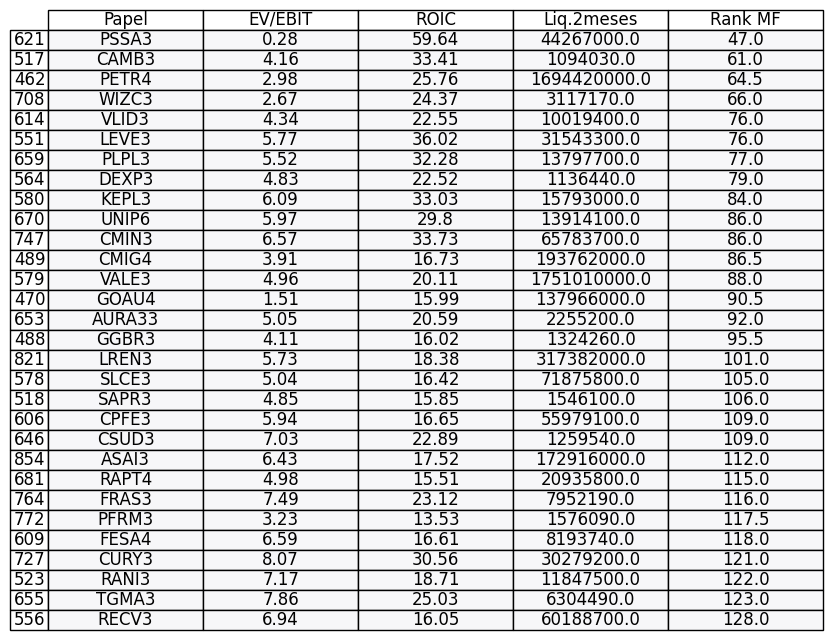

In [11]:
# Código para criar o DataFrame e as configurações do estilo (styles)...

# Caminho completo para o diretório onde você deseja salvar a imagem
caminho_do_diretório = r'C:\Users\dioni\iCloudDrive\Python Projects\MagicFormula'

# Crie uma função para gerar e salvar a tabela
def salvar_tabela_como_imagem(df, caminho_do_diretório):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    cell_colors = [['#f7f7f9'] * len(df.columns)] * len(df)  # Cor de fundo para todas as células
    tbl = table(ax, df, loc='center', cellLoc='center', cellColours=cell_colors)
    tbl.set_fontsize(14)
    tbl.scale(1, 1.2)

    for k, cell in tbl._cells.items():
        cell.set_fontsize(12)
        text = cell.get_text().get_text()
        if text.startswith("Número"):
            cell.set_text_props(**styles[0])
        else:
            cell.set_text_props(**styles[1])

    # Salvar a tabela como uma imagem JPEG de alta qualidade
    plt.savefig(caminho_do_diretório + '\\ranking_table.jpg', bbox_inches='tight', pad_inches=0.5, dpi=600)
    plt.close()

# Salve a tabela com a função
salvar_tabela_como_imagem(top_30_ranking, caminho_do_diretório)